## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:



The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate.

#### Importing the libraries.

In [1]:
#import the warnings.


In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Session- 2, Data Cleaning

### Segment- 2, Data Types

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame.

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type**
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set.

In [3]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0=  pd.read_csv('1715355252301_aa1036f672.csv')

<ipython-input-3-36c957653c92>:2: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  inp0=  pd.read_csv('1715355252301_aa1036f672.csv')


In [4]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately.
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [5]:
#read the file in inp0 without first two rows as it is of no use.
inp0.columns = inp0.iloc[1]
inp0.drop(inp0.index[1])
inp0 = inp0.drop(0)
inp0 = inp0.drop(1)

In [6]:
#print the head of the data frame.
inp0.head()

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
6,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
#print the information of variables to check their data types.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 2 to 45212
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45211 non-null  object
 1   age         45191 non-null  object
 2   salary      45211 non-null  object
 3   balance     45211 non-null  object
 4   marital     45211 non-null  object
 5   jobedu      45211 non-null  object
 6   targeted    45211 non-null  object
 7   default     45211 non-null  object
 8   housing     45211 non-null  object
 9   loan        45211 non-null  object
 10  contact     45211 non-null  object
 11  day         45211 non-null  object
 12  month       45161 non-null  object
 13  duration    45211 non-null  object
 14  campaign    45211 non-null  object
 15  pdays       45211 non-null  object
 16  previous    45211 non-null  object
 17  poutcome    45211 non-null  object
 18  response    45181 non-null  object
dtypes: object(19)
memory usage: 6.6+ MB


In [8]:
#convert the age variable data type from float to integer.
inp0['age'] = pd.to_numeric(inp0['age'])
inp0['age'] = inp0['age'].fillna(0)
inp0['age'] = inp0['age'].apply(np.int64)
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 2 to 45212
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45211 non-null  object
 1   age         45211 non-null  int64 
 2   salary      45211 non-null  object
 3   balance     45211 non-null  object
 4   marital     45211 non-null  object
 5   jobedu      45211 non-null  object
 6   targeted    45211 non-null  object
 7   default     45211 non-null  object
 8   housing     45211 non-null  object
 9   loan        45211 non-null  object
 10  contact     45211 non-null  object
 11  day         45211 non-null  object
 12  month       45161 non-null  object
 13  duration    45211 non-null  object
 14  campaign    45211 non-null  object
 15  pdays       45211 non-null  object
 16  previous    45211 non-null  object
 17  poutcome    45211 non-null  object
 18  response    45181 non-null  object
dtypes: int64(1), object(18)
memory usage: 6.6+ MB


In [9]:
#print the average age of customers.
np.mean(inp0['age'])

40.917542191059695

#### Dropping customer id column.

In [10]:
#drop the customer id as it is of no use.
inp0 = inp0.drop('customerid',axis=1)
inp0

1,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
6,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories.

In [11]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0[['job','education']]=inp0['jobedu'].str.split(',',expand=True)
inp0

1,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
2,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
3,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
4,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
5,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
6,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45209,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45210,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45211,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [12]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0

1,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
2,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
3,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
4,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
5,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
6,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45209,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45210,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45211,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [13]:
#drop the "jobedu" column from the dataframe.
inp0.drop(['jobedu'], axis=1)

1,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
2,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
3,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
4,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
5,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
6,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,51,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45209,71,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45210,72,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45211,57,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


### Segment- 4, Impute/Remove missing values

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [14]:
#count the missing values in age column.
inp0.age.isnull().sum(axis=0)

0

In [15]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 20)

In [16]:
#calculate the percentage of missing values in age column.
round(100*(inp0.age.isnull().sum(axis=0)/len(inp0.index)),2)


0.0

No missing values in age column

Drop the records with age missing.

In [17]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1 = inp0.drop(inp0[inp0['age'] == 'Nan'].index)
inp1

1,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
2,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
3,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
4,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
5,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
6,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45209,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45210,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45211,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


#### handling missing values in month column

In [18]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum(axis=0)


50

In [19]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize=True) *100

month
may, 2017    30.439981
jul, 2017    15.252098
aug, 2017    13.817232
jun, 2017    11.813290
nov, 2017     8.786342
apr, 2017     6.490113
feb, 2017     5.859038
jan, 2017     3.104449
oct, 2017     1.634153
sep, 2017     1.275437
mar, 2017     1.054007
dec, 2017     0.473860
Name: proportion, dtype: float64

In [20]:
#find the mode of month in inp1
mode_month=inp1.month.mode()[0]
mode_month


'may, 2017'

In [21]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(mode_month,inplace=True)

In [22]:
#let's see the null values in the month column.
inp1.month.isna().sum()

0

#### handling missing values in response column

In [23]:
#count the missing values in response column in inp1.
inp1.response.isna().sum()

30

In [24]:
#calculate the percentage of missing values in response column.
round(100*(inp1.response.isna().sum())/len(inp1.index),3)

0.066

Target variable is better of not imputed.
- Drop the records with missing values.

In [25]:
#drop the records with response missings in inp1.
inp1=inp1[~inp1.response.isna()]
inp1

1,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
2,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
3,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
4,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
5,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
6,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45209,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45210,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45211,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [26]:
#calculate the missing values in each column of data frame: inp1.
print(inp1.isnull().sum())

1
age          0
salary       0
balance      0
marital      0
jobedu       0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64


#### handling pdays column.

In [27]:
#describe the pdays column of inp1.
inp1['pdays'].describe()

count     45181
unique      836
top          -1
freq      30259
Name: pdays, dtype: object

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [28]:
#describe the pdays column with considering the -1 values.
inp1['pdays'] = inp1['pdays'].astype(float)
inp1.loc[inp1.pdays<0,"pdays"]= np.NaN
inp1.pdays.describe()

<ipython-input-28-173984b57d27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['pdays'] = inp1['pdays'].astype(float)


count    8251.000000
mean      224.596170
std       115.352191
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers

Major approaches to the treat outliers:

- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable

In [29]:
#describe the age variable in inp1.
inp1['age'].describe()

count    45181.000000
mean        40.917642
std         10.651303
min          0.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

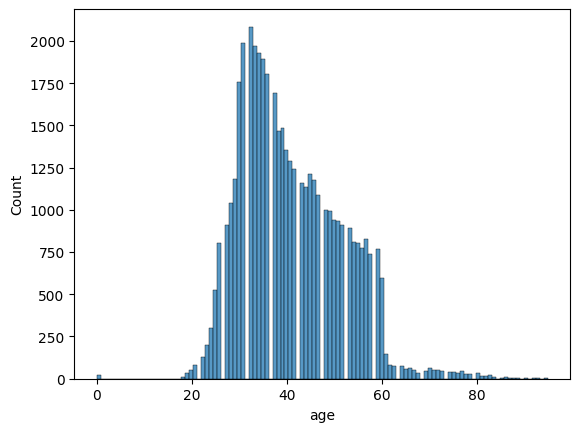

In [30]:
#plot the histogram of age variable.
#inp1.age.plot.hist()
#plt.show()
sns.histplot(data=inp1, x="age")

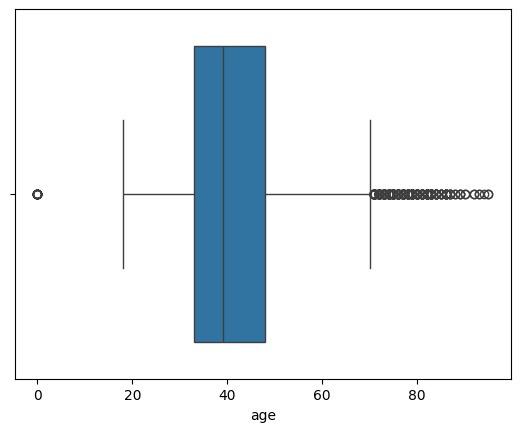

In [31]:
#plot the boxplot of age variable.
ax = sns.boxplot(x=inp1["age"])

#### Salary variable

In [32]:
#describe the salary variable of inp1.
inp1['salary'].describe()

count     45181
unique       22
top       20000
freq       7286
Name: salary, dtype: object

<ipython-input-33-9d2d363a4718>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['salary'] = inp1['salary'].astype(float)


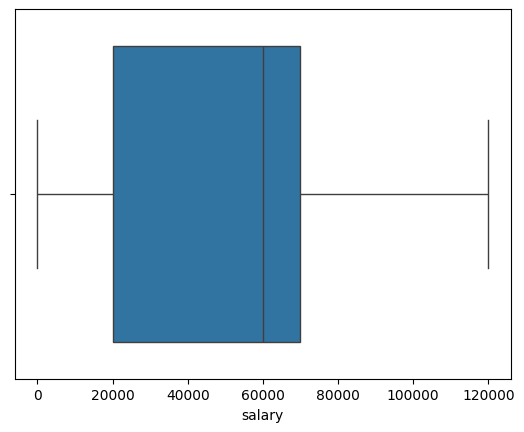

In [33]:
#plot the boxplot of salary variable.
inp1['salary'] = inp1['salary'].astype(float)
ax = sns.boxplot(x=inp1["salary"])

#### Balance variable

In [34]:
#describe the balance variable of inp1.
inp1['balance'].describe()

count     45181
unique    10331
top           0
freq       2764
Name: balance, dtype: object

<ipython-input-35-a49dc4744ad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['balance'] = inp1['balance'].astype(float)


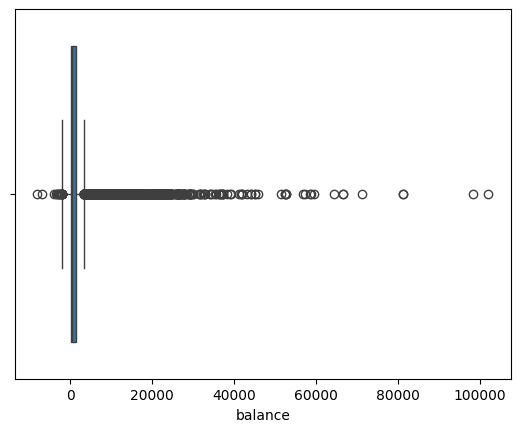

In [35]:
#plot the boxplot of balance variable.
inp1['balance'] = inp1['balance'].astype(float)
ax = sns.boxplot(x=inp1["balance"])

<Axes: xlabel='balance'>

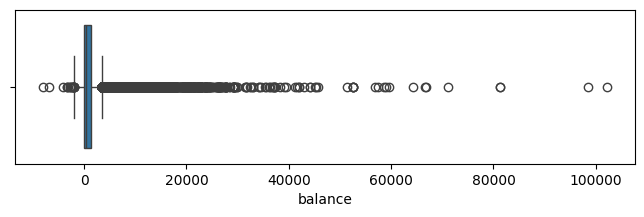

In [36]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=(8,2))
sns.boxplot(x=inp1.balance)

In [37]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5, 0.7, 0.9, 0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5769.0
0.99    13169.2
Name: balance, dtype: float64

### Segment- 6, Standardising values

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [38]:
#describe the duration variable of inp1
inp1.duration.describe()

count       45181
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [39]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration=inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

<ipython-input-39-8fc3d2630ea9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1.duration=inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))


In [40]:
#describe the duration variable
inp1.duration.describe()


count    45181.000000
mean         4.302462
std          4.292520
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Session- 3, Univariate Analysis

### Segment- 2, Categorical unordered univariate analysis

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status

In [41]:
#calculate the percentage of each marital status category.
marital=inp1.marital.value_counts(normalize=True)*100
marital

marital
married     60.191231
single      28.290653
divorced    11.518116
Name: proportion, dtype: float64

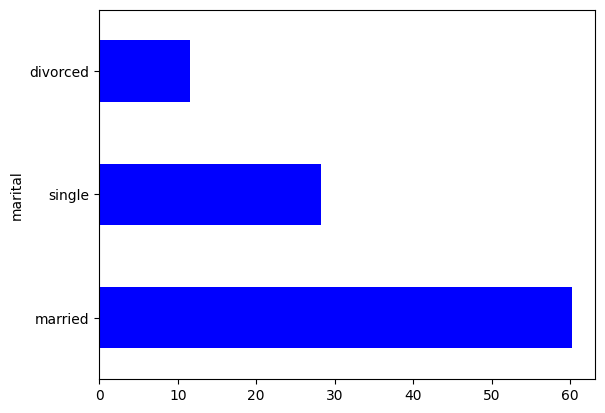

In [42]:
#plot the bar graph of percentage marital status categories
marital.plot.barh(color='b')
plt.show()

#### Job  

In [43]:
#calculate the percentage of each job status category.
job=inp1.job.value_counts(normalize=True)*100
job

job
blue-collar      21.528961
management       20.924725
technician       16.803524
admin.           11.434010
services          9.185277
retired           5.008743
self-employed     3.485979
entrepreneur      3.288993
unemployed        2.883956
housemaid         2.742303
student           2.076094
unknown           0.637436
Name: proportion, dtype: float64

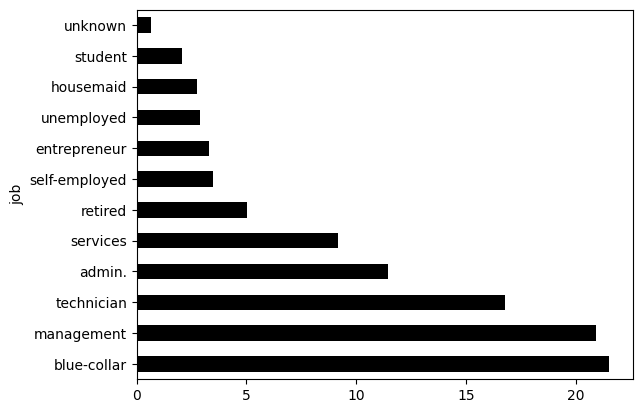

In [44]:
#plot the bar graph of percentage job categories
job.plot.barh(color='k')
plt.show()

### Segment- 3, Categorical ordered univariate analysis

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [45]:
#calculate the percentage of each education category.
education=inp1.education.value_counts(normalize=True)*100
education

education
secondary    51.324672
tertiary     29.419446
primary      15.147960
unknown       4.107921
Name: proportion, dtype: float64

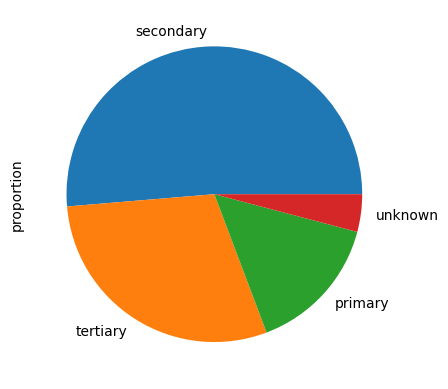

In [46]:
#plot the pie chart of education categories
education.plot.pie()
plt.show()

#### poutcome

In [47]:
#calculate the percentage of each poutcome category.
poutcome=inp1.poutcome.value_counts(normalize=True)*100
poutcome

poutcome
unknown    81.748965
failure    10.838627
other       4.070295
success     3.342113
Name: proportion, dtype: float64

#### Response the target variable

In [48]:
#calculate the percentage of each response category.
response=inp1.response.value_counts(normalize=True)*100
response

response
no     88.298178
yes    11.701822
Name: proportion, dtype: float64

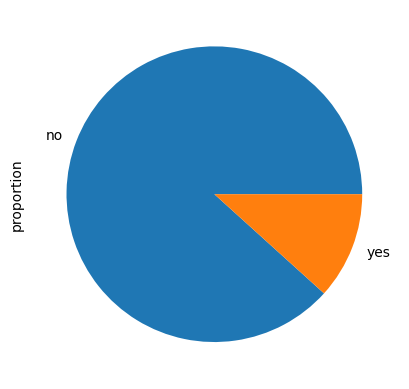

In [49]:
#plot the pie chart of response categories
response.plot.pie()
plt.show()

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

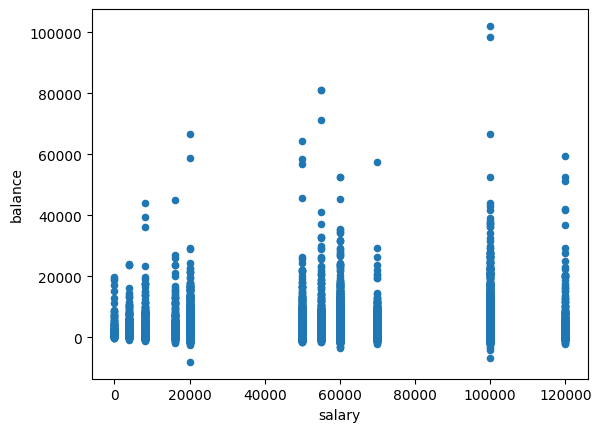

In [50]:
#plot the scatter plot of balance and salary variable in inp1
inp1.plot.scatter(x='salary',y='balance')
plt.show()

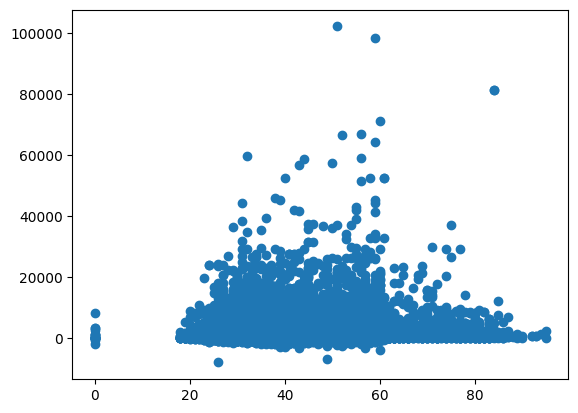

In [51]:
#plot the scatter plot of balance and age variable in inp1
plt.scatter(inp1.age,inp1.balance)
plt.show()

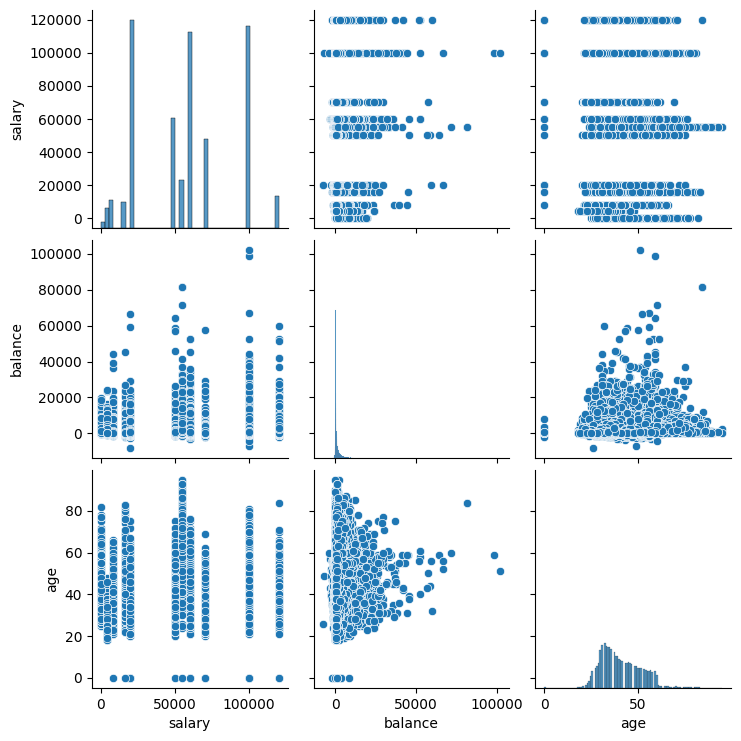

In [52]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1,vars=['salary','balance','age'])
plt.show()

#### Correlation heat map

In [53]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
inp1[['salary','balance','age']].corr()

1,salary,balance,age
1,,,
salary,1.000000,0.055453,0.024403
balance,0.055453,1.000000,0.097583
age,0.024403,0.097583,1.000000


### Segment- 4, Numerical categorical variable

#### Salary vs response

In [54]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby("response")["salary"].mean()

response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64

In [55]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby("response")["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

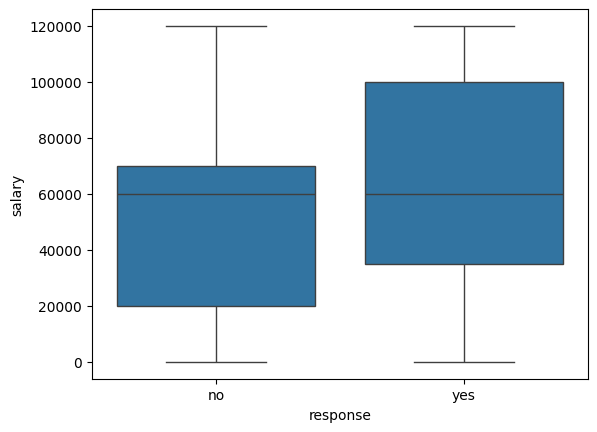

In [56]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1,x='response',y='salary')
plt.show()


#### Balance vs response

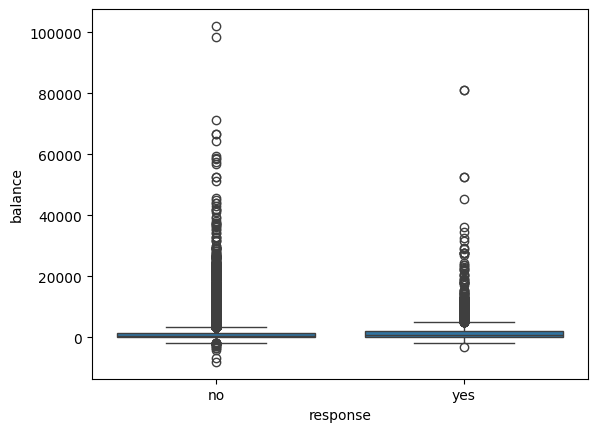

In [57]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp1,x='response',y='balance')
plt.show()

In [58]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby("response")['balance'].mean()

response
no     1304.094525
yes    1804.832041
Name: balance, dtype: float64

In [59]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby("response")['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile

In [60]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [61]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby("response")['balance'].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1304.094525,417.0,1345.0
yes,1804.832041,733.0,2159.5


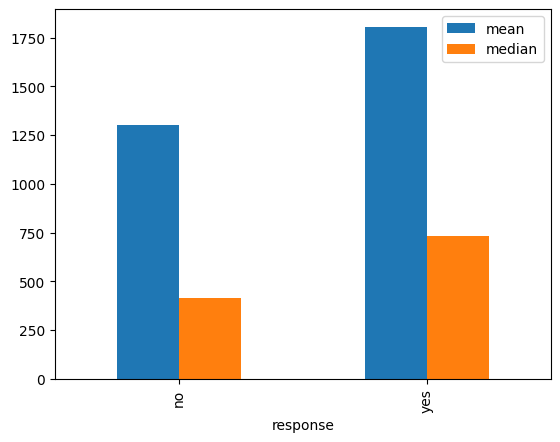

In [62]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby("response")['balance'].aggregate(["mean","median"]).plot.bar()
plt.show()

#### Education vs salary

In [63]:
#groupby the education to find the mean of the salary education category.
inp1.groupby("education")["salary"].mean()

education
primary      34220.192870
secondary    49739.143559
tertiary     82875.564249
unknown      46529.633621
Name: salary, dtype: float64

In [64]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby("education")["salary"].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

In [65]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby("job")["salary"].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

### Segment- 5, Categorical categorical variable

In [66]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1['response_flag']=np.where(inp1.response=='yes',1,0)
inp1.response_flag.value_counts()

<ipython-input-66-2e60d42e9f7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['response_flag']=np.where(inp1.response=='yes',1,0)


response_flag
0    39894
1     5287
Name: count, dtype: int64

#### Education vs response rate

In [67]:
#calculate the mean of response_flag with different education categories.
inp1.groupby("education")["response_flag"].mean()

education
primary      0.086353
secondary    0.105610
tertiary     0.150090
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate

In [68]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby("marital")["response_flag"].mean()

marital
divorced    0.119523
married     0.101269
single      0.149507
Name: response_flag, dtype: float64

<Axes: ylabel='marital'>

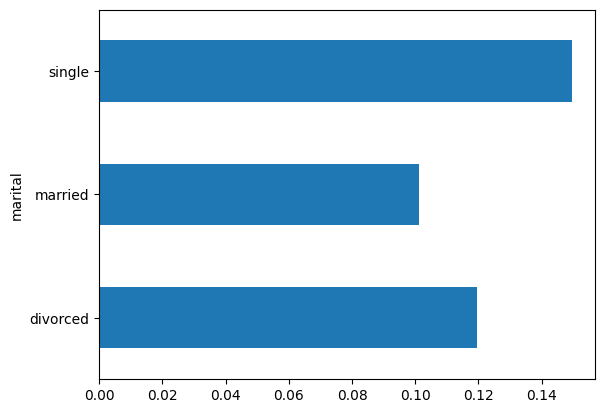

In [69]:
#plot the bar graph of marital status with average value of response_flag
(inp1.groupby("marital")["response_flag"].mean()).plot.barh()

#### Loans vs response rate

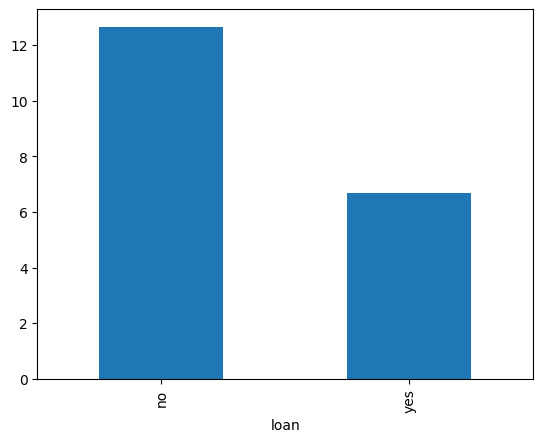

In [70]:
#plot the bar graph of personal loan status with average value of response_flag
(inp1.groupby("loan")["response_flag"].mean()*100).plot.bar()
plt.show()

#### Housing loans vs response rate

<Axes: xlabel='housing'>

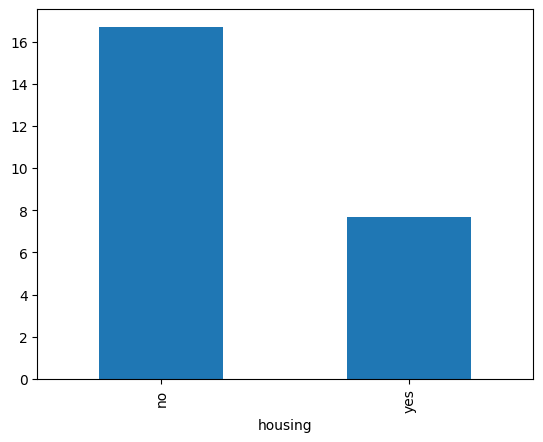

In [71]:
#plot the bar graph of housing loan status with average value of response_flag
(inp1.groupby("housing")["response_flag"].mean()*100).plot.bar()

#### Age vs response

<Axes: xlabel='response_flag', ylabel='age'>

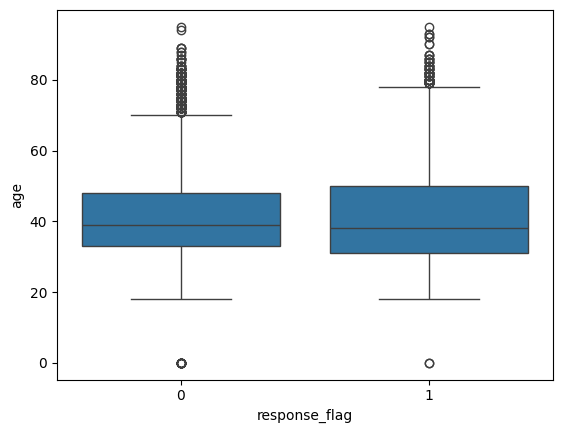

In [72]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp1,x='response_flag',y='age')

##### making buckets from age columns

In [73]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp1["age_group"]= pd.cut(inp1.age,[0,30,40,50,60,120],labels=["<30", "30-40", "40-50","50-60","60+"])

<ipython-input-73-1127a2515934>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1["age_group"]= pd.cut(inp1.age,[0,30,40,50,60,120],labels=["<30", "30-40", "40-50","50-60","60+"])


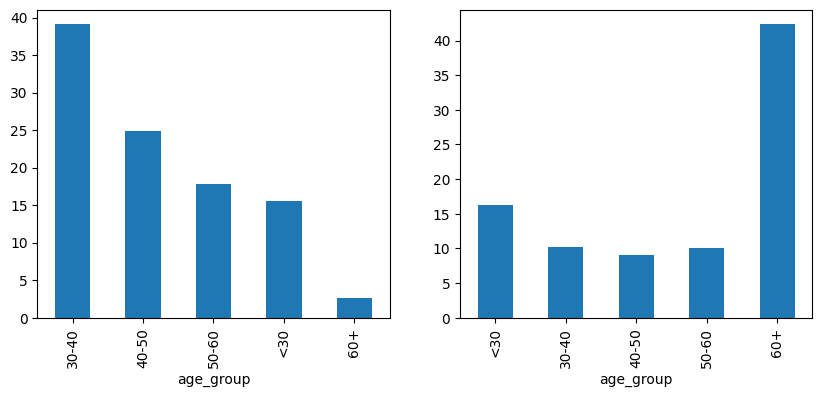

In [74]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
(inp1.age_group.value_counts(normalize=True)*100).plot.bar()
plt.subplot(1,2,2)
(inp1.groupby(['age_group'])['response_flag'].mean()*100).plot.bar()
plt.show()

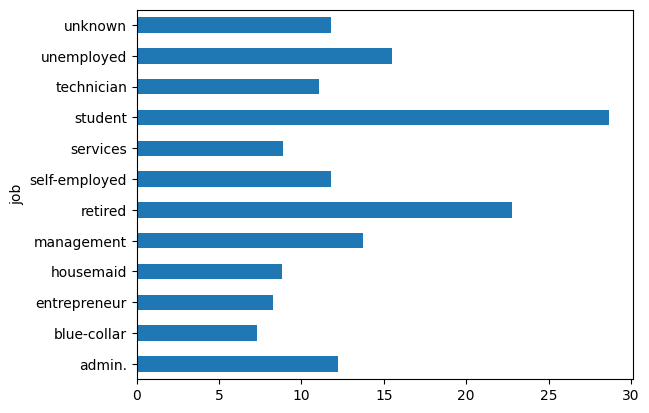

In [75]:
#plot the bar graph of job categories with response_flag mean value.
(inp1.groupby(['job'])['response_flag'].mean()*100).plot.barh()
plt.show()

### Segment-6, Multivariate analysis

#### Education vs marital vs response

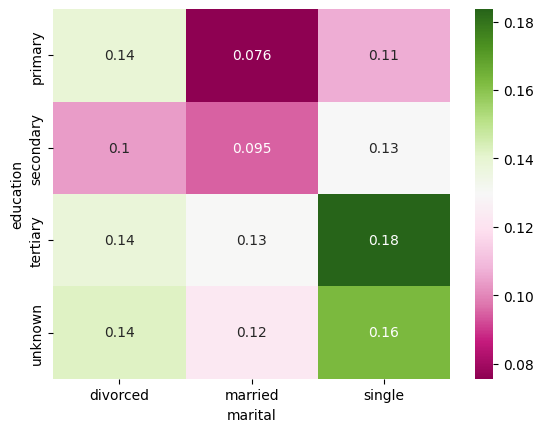

In [76]:
#create heat map of education vs marital vs response_flag
ax=pd.pivot_table(data=inp1,index="education",columns='marital',values='response_flag')
sns.heatmap(ax,annot=True,cmap='PiYG')
plt.show()

#### Job vs marital vs response

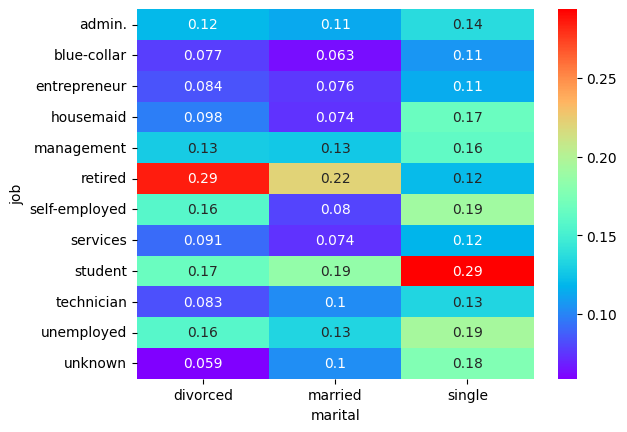

In [77]:
#create the heat map of Job vs marital vs response_flag.
ax=pd.pivot_table(data=inp1,index='job',columns='marital',values='response_flag')
sns.heatmap(ax,annot=True,cmap='rainbow')
plt.show()

#### Education vs poutcome vs response

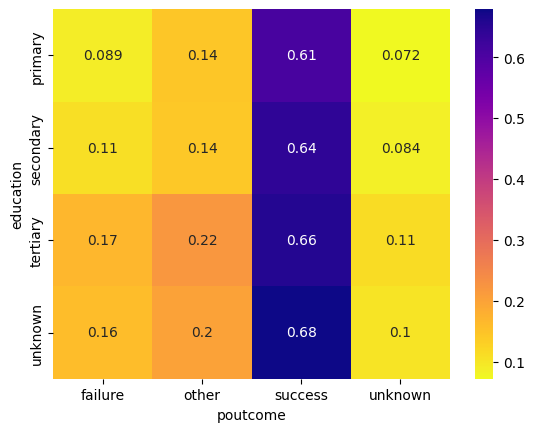

In [78]:
#create the heat map of education vs poutcome vs response_flag.
ax=pd.pivot_table(data=inp1,index='education',columns='poutcome',values='response_flag')
sns.heatmap(ax,annot=True,cmap='plasma_r')
plt.show()